In [20]:
#necessary libraries
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


In [21]:
# Reading the CSV file
df = pd.read_csv("iris.csv")

print("Descriptive Statistics:")
print(df.describe())



Descriptive Statistics:
       sepal.length  sepal.width  petal.length  petal.width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [30]:
# Calculate the number of null values in each column
null_columns = df.isnull().sum()
print(null_columns)



sepal.length    0
sepal.width     0
petal.length    0
petal.width     0
variety         0
dtype: int64


In [22]:
# Separate features and target variable
X = df[['sepal.length', 'sepal.width', 'petal.length', 'petal.width']]
y = df['variety']

# Initialize a DecisionTreeClassifier
clf = DecisionTreeClassifier()

# Define the number of folds for cross-validation
n_splits = 5

# Initialize StratifiedKFold
skf = StratifiedKFold(n_splits=n_splits)

# Lists to store accuracy scores for each fold
accuracy_scores = []

# Perform cross-validation
for train_index, test_index in skf.split(X, y):
    # Split the data into training and testing sets for this fold
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)

    # Make predictions on the testing data
    y_pred = clf.predict(X_test)

    # Calculate accuracy for this fold
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Calculate and print the mean accuracy across all folds
mean_accuracy = sum(accuracy_scores) / n_splits
print("Mean Accuracy:", mean_accuracy)


Mean Accuracy: 0.9533333333333334


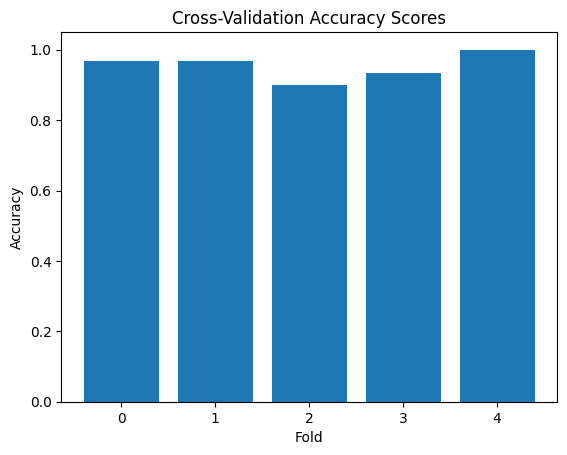

In [23]:
import matplotlib.pyplot as plt

# Create a bar plot of the accuracy scores
plt.bar(range(n_splits), accuracy_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.show()

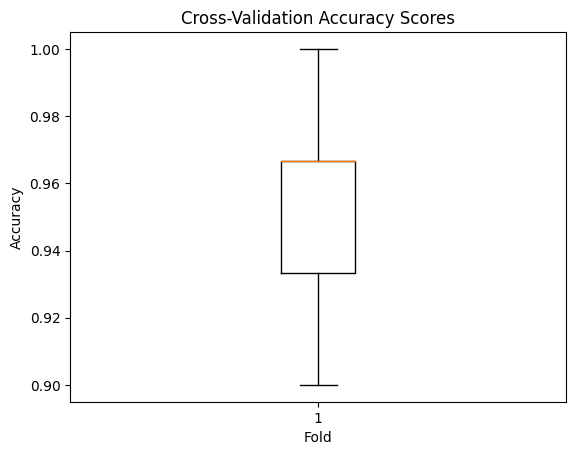

In [24]:
import matplotlib.pyplot as plt

# Create a box plot of the accuracy scores
plt.boxplot(accuracy_scores)
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.title('Cross-Validation Accuracy Scores')
plt.show()

In [25]:
from sklearn.metrics import classification_report

# Fit the classifier on the entire dataset
clf.fit(X, y)

#for predictions
y_pred = clf.predict(X)

#classification report
print("Classification Report:")
print(classification_report(y, y_pred))


Classification Report:
              precision    recall  f1-score   support

      Setosa       1.00      1.00      1.00        50
  Versicolor       1.00      1.00      1.00        50
   Virginica       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



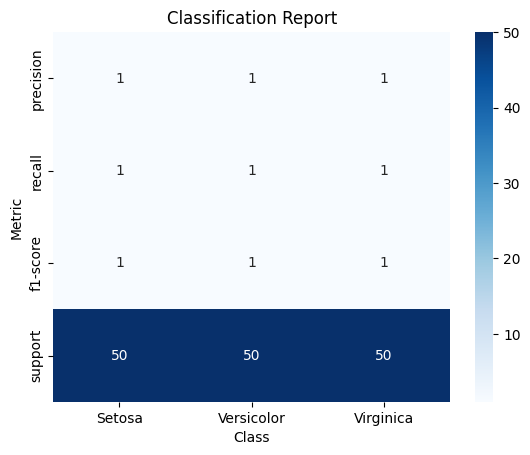

In [26]:

# Generate the classification report as a string
report = classification_report(y, y_pred)

# Convert the classification report string to a DataFrame
report_data = []
lines = report.split('\n')
for line in lines[2:-5]:
    row = {}
    row_data = line.split()
    row['class'] = row_data[0]
    row['precision'] = float(row_data[1])
    row['recall'] = float(row_data[2])
    row['f1-score'] = float(row_data[3])
    row['support'] = float(row_data[4])
    report_data.append(row)
df_report = pd.DataFrame(report_data)

# Create a heatmap of the classification report
sns.heatmap(df_report.set_index('class').T, annot=True, cmap='Blues')
plt.xlabel('Class')
plt.ylabel('Metric')
plt.title('Classification Report')
plt.show()

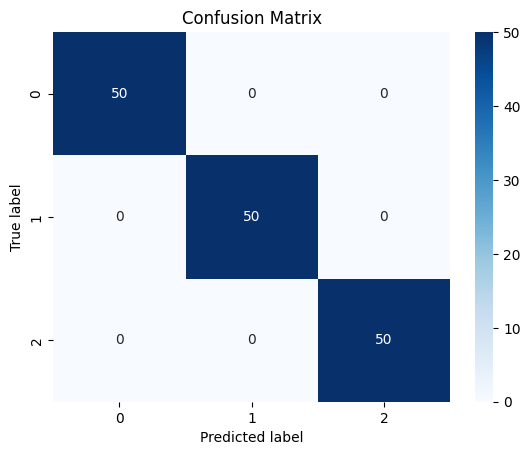

In [27]:


# Create a confusion matrix
cm = confusion_matrix(y, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()